1\. Write a function that converts number representation (bin<->dec<->hex)

In [2]:
def decbin(x):
    '''converts from decimal to binary'''
    a = ''
    if x < 0:
        sign = 1
        x = -x
    else:
        sign = 0
    while x != 0:
        a += str(x % 2)
        x = x // 2
        #print(x)
    while len(a) < 7:
        a += '0'
    a += str(sign)
    return a[::-1]

def bindec(x):
    '''converts binary tro decimal'''
    strx = str(x)[::-1]
    b = 0
    for i in range(len(strx)):
        b += int(strx[i]) * 2**i
    return b

def dechex(x):
    '''converts decimal to hexadecimal'''
    a = ''
    hexa = ['0', '1', '2', '3', '4', '5', '6', '7',
            '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    if x < 16 and x >= 0:
        return hexa[x]
    elif x >= 16:
        while x != 0:
            a += str(hexa[x % 16])
            x = x // 16
            #print(str(x % 16))
        return a[::-1]
    else:
        return "Don't know how to handle the sign yet."
    
def hexdec(x):
    '''converts hexadecimal to decimal'''
    hexa = ['0', '1', '2', '3', '4', '5', '6', '7',
            '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    strx = str(x)[::-1].upper()
    deca = []
    for i in strx:
        for j in range(len(hexa)):
            if i == hexa[j]:
                deca.append(j)
    b = 0
    for i in range(len(strx)):
        b += int(deca[i]) * 16**i
    return b 

def convert(x, ini = 'dec', fin = 'bin'):
    if ini == 'dec' and fin == 'bin':
        return decbin(x)
    
    elif ini == 'bin' and fin == 'dec':
        return bindec(x)    
            
    elif ini == 'dec' and fin == 'hex':
        return dechex(x)    
    
    elif ini == 'hex' and fin == 'dec':
        return hexdec(x)
    
    elif ini == 'bin' and fin == 'hex':
        return dechex(bindec(x))
    
    elif ini == 'hex' and fin == 'bin':
        return decbin(hexdec(x))
        
    else:
        return 'Wrong arguments, check again'

print(convert('9eb26958', 'hex', 'dec'))
print(convert( 59632498 , 'dec', 'hex'))
print(convert( 11110000 , 'bin', 'dec'))
print(convert( 11110000 , 'bin', 'hex'))
print(convert('9eb26958', 'hex', 'bin'))

2662492504
38DEB72
240
F0
010011110101100100110100101011000


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [3]:
def reader_32_bit(string):
    '''converts 32 bit numbers to decimal'''
    if len(string) != 32:
        return 'Error: wrong number of bits ' + str(len(string))
    if string[0] == '0':
        s = 1
    else:
        s = -1
    e = int(string[1:9],2)-127
    M = string[9:]
    m = 1
    for i in range(len(M)):
        m += int(M[i],10)*2**(-i-1)
    return s*m*2**e

a = '01010101001001111000010010011001'
print(reader_32_bit(a))

11511746527232.0


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [4]:
a = 1.

while a - a == 0:
    b  = a
    a *= 2
print('Overflow: ', b)

a = 1.

while a != 0:
    b = a
    a /= 2

print('Underflow: ', b)

Overflow:  8.98846567431158e+307
Underflow:  5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [11]:
prc = 1
while prc + 1 != 1:
    prc /= 2
print('Machine precision: ', prc)

Machine precision:  1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [6]:
import math
def quad1(a, b, c):
    '''compute solutions in the first way'''
    x1 = (-b - math.sqrt(b*b - 4*a*c)) / (2*a)
    x2 = (-b + math.sqrt(b*b - 4*a*c)) / (2*a)
    return x1, x2

def quad2(a, b, c):
    '''compute solutions in the second way'''
    x1 = 2*c / (-b + math.sqrt(b*b - 4*a*c))
    x2 = 2*c / (-b - math.sqrt(b*b - 4*a*c))
    return x1, x2

def quad3(a, b, c):
    '''compute solutions in the best way'''
    x1 = (-b - math.sqrt(b*b - 4*a*c)) / (2*a)
    x2 = 2*c / (-b - math.sqrt(b*b - 4*a*c))
    return x1, x2

X1, X2 = quad1(0.001,1000,0.001)
print('x1 = ',X1, 'x2 =', X2)
#X1 accurate, X2 not accurate

X1, X2 = quad2(0.001,1000,0.001)
print('x1 = ',X1, 'x2 =', X2)
#X1 not accurate, X2 accurate

    
X1, X2 = quad3(0.001,1000,0.001)
print('x1 = ',X1, 'x2 =', X2)

x1 =  -999999.999999 x2 = -9.999894245993346e-07
x1 =  -1000010.5755125057 x2 = -1.000000000001e-06
x1 =  -999999.999999 x2 = -1.000000000001e-06


The problem is in the evalutation of 
$$
-b + \sqrt{b^2 - 4ac}
$$
that approaches to 0

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

1.010000000000001
1.010000000000001
1.0000999999998899
1.0000009999177333
1.0000000039225287
1.000000082840371
1.0000889005833413
0.9992007221626509

Computed value for 𝛿 = 10e-14:  9.992007221626508e-15 different from the true value: 1.00000000000001e-14


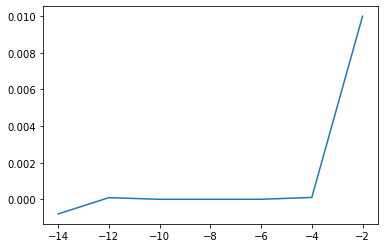

In [7]:
def f(x):
    '''compute the function value'''
    return x*(x-1)

𝛿  = 10**(-2)
df = (f(1+𝛿) - f(1)) / 𝛿
print(df)

l = [-2, -4, -6, -8, -10, -12, -14]
m =[]
for i in l:
    𝛿 = 10**i
    m.append((f(1+𝛿) - f(1)) / 𝛿 - 1)
    print((f(1+𝛿) - f(1)) / 𝛿)

print("\nComputed value for 𝛿 = 10e-14: ", f(1+10**(-14)), "different from the true value:", 1.00000000000001e-14)

import matplotlib.pyplot as plt

#Print the difference from the true value
plt.plot(l, m)
plt.show()

Mathematically the derivative compute goes progressively better decreasing the value of $\delta$, hence the difference from the true value is better for $10^{-4}$ than $10^{-2}$.
Reducing too much the value of $\delta$ the accuracy goes worse because we are making operations beetwen numbers of very different magnitude.

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [14]:
value = math.pi/2
print("True value = ", value)

def func(x):
    '''evaluate the function value'''
    return math.sqrt(1-x**2)

def integral(N):
    '''evaluate the integral by Riemann definition'''
    h = 2/N
    l = [-1 + h/2 + i*h for i in range(N)]
    Y = [h * func(i) for i in l]
    return sum(Y)

N = 100
I = integral(N)
print("\nN = 100 computation: ", I)

Delta = I - value
print("Delta = ", Delta)

l = [3, 4, 5, 6, 7]
for i in l:
    print(integral(10**i))
    %timeit integral(10**i)

# 1 second computation
N = 12*10**5
I = integral(N)
print("\n1 s computation: ", I)
Delta = I - value
print("Delta = ", Delta)
#%timeit integral(N)

# 1 minute computation
N = 8*10**7
I = integral(N)
print("\n1 min computation: ", I)
Delta = I - value
print("Delta = ", Delta)

True value =  1.5707963267948966

N = 100 computation:  1.5712827762297958
Delta =  0.00048644943489928316
1.5708117284099565
702 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.5707968138960273
7.09 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.5707963421985762
73.4 ms ± 771 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.570796327282045
770 ms ± 9.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.5707963268100595
7.65 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

1 s computation:  1.5707963271654952
Delta =  3.7059866286881515e-10
897 ms ± 5.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

1 min computation:  1.570796326795324
Delta =  4.2743586448068527e-13
